## Breast Tumor Classifier

### Author: Brindha Ganesan

#### Date: March 15, 2024

## Problem Statement

Histopathological images are fundamental in diagnosing breast cancer, offering detailed insights into tissue morphology and cellular structures. However, accurately classifying breast tumors from histopathological images presents unique challenges due to variations in tissue appearance, staining techniques, and tumor heterogeneity.

This capstone project aims to develop a robust and accurate breast tumor classifier using machine learning techniques applied to histopathological images. The primary objective is to create a model capable of distinguishing between benign and malignant tumors with high precision and recall, leveraging the rich information contained within histopathological images.

## Proposed Solution

1. Preprocessing of Histopathological Images
2. Feature Extraction and Representation
3. Model Training
4. Model Evaluation
5. Model Deployment
6. Productizing the work


## Introduction

The primary objective of this project is to harness machine learning techniques for the classification of breast tumours as benign or malignant using histopathological images. 

This notebook contains:

- An overview of the dataset and preprocessing procedures
- A few important findings from EDA
- Baseline models and evaluation metrics
- Next steps for advanced modeling and productizing the work

## Table of Contents

[1. Data Source](#Data-Source) <br>


[2. Loading Data](#Loading-Data) <br>

[3. Exploratory Data Analysis](#Exploratory-Data-Analysis) <br>

## Data Source

#### A Dataset for Breast Cancer Histopathological Image Classification

#### Breast Cancer Histopathological Database

[BreaKHis – Breast Cancer Histopathological Database](https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/) by [Spanhol, F., Oliveira, L. S., Petitjean, C. and Heutte, L.](https://ieeexplore.ieee.org/document/7312934) is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)

The Breast Cancer Histopathological Image Classification (BreakHis) is composed of images of breast tumor tissue collected from 82 patients using different magnifying factors (40X, 100X, 200X, and 400X). To date, it contains 2,480 benign and 5,429 malignant samples (700X460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format). 

#### Characteristics

The BreaKHis dataset is divided into two main groups: benign tumors and malignant tumors.In current version, samples present in dataset were collected by SOB method, also named partial mastectomy or excisional biopsy. This type of procedure, compared to any methods of needle biopsy, removes the larger size of tissue sample and is done in a hospital with general anesthetic.

The BreaKHis 1.0 is structured as follows:



In [1]:
# import the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

import cv2

## Exploratory Data Analysis

In [2]:
# The BreaKHis 1.0 is structured as follows

breakhis = {
    'Magnification': ['40X', '100X', '200X', '400X'],
    'Benign': [652,644,623, 588],
    'Malignant': [1370, 1437, 1390, 1232]
}

In [3]:
# Load the data into a dataframe

breakhis = pd.DataFrame(breakhis)
breakhis

Magnification  Benign  Malignant
0           40X     652       1370
1          100X     644       1437
2          200X     623       1390
3          400X     588       1232

Now let us Visualize the counts of benign and malignant cases for each magnification level in a bar chart. 

In [4]:
# Set the index to Magnification column
breakhis.set_index('Magnification', inplace=True)

In [5]:
breakhis

Benign  Malignant
Magnification                   
40X               652       1370
100X              644       1437
200X              623       1390
400X              588       1232

In [6]:
breakhis[['Benign', 'Malignant']]

Benign  Malignant
Magnification                   
40X               652       1370
100X              644       1437
200X              623       1390
400X              588       1232

<Figure size 1000x600 with 0 Axes>

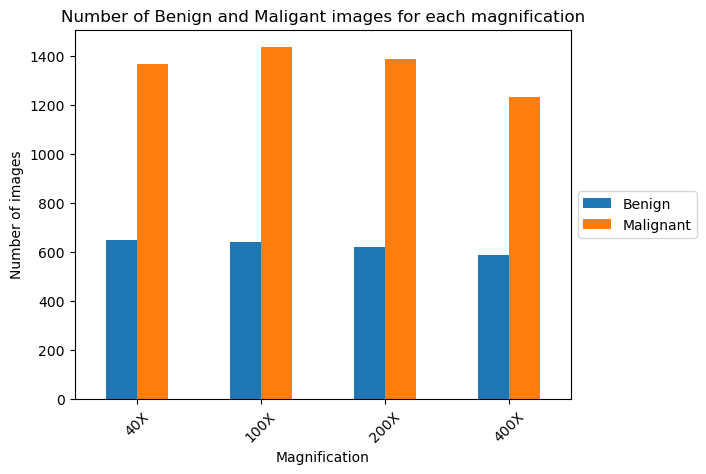

In [7]:
# Benign and Maligant images for each magnification

# Adjusting figure size
plt.figure(figsize=(10, 6))

# Plotting
breakhis.plot(kind='bar', stacked=False)

# Placing the legend outside of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Number of Benign and Maligant images for each magnification')
plt.xlabel('Magnification')
plt.ylabel('Number of images')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Benign and Maligant images in total

# Data
breakhis_total = {
    'Benign Images': 2480,
    'Malignant Images': 5429
}

# Convert the dictionary into a pandas DataFrame
breakhis_total = pd.DataFrame.from_dict(breakhis_total, orient='index', columns=['Total'])
breakhis_total

Total
Benign Images      2480
Malignant Images   5429

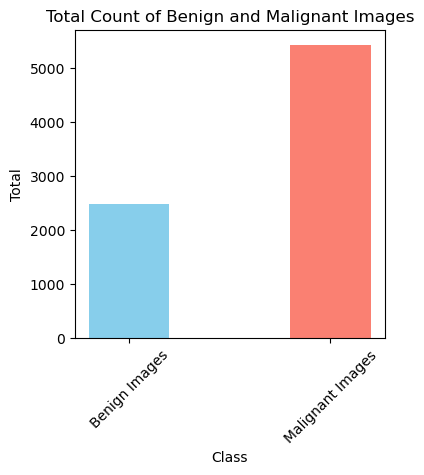

In [9]:
# Visualize the data
plt.figure(figsize=(4,4))
plt.bar(breakhis_total.index, breakhis_total['Total'], color=['skyblue', 'salmon'], width = 0.4)
plt.title('Total Count of Benign and Malignant Images')
plt.xlabel('Class')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

- There are 2480 images classified as benign. In medical contexts, "benign" typically refers to conditions or tumors that are not harmful or cancerous.

- There are 5429 images classified as malignant. In medical contexts, "malignant" typically refers to conditions or tumors that are cancerous or harmful.

#### Class imbalance

-  The majority of the images (5429) are classified as malignant (cancerous), while a smaller portion (2480) are classified as benign (non-cancerous).

- This type of data distribution indicates a class imbalance, with the "Malignant Images" class being the majority class and the "Benign Images" class being the minority class. Class imbalance can pose challenges in machine learning tasks, and special attention should be paid to ensure that the model does not become biased towards the majority class and performs well on both classes. Techniques such as data augmentation, resampling, or using specialized loss functions can be employed to address class imbalance during model training.


## More EDA

Now, let's compare images in terms of the distribution of pixel sizes to assess malignancy or benignity. Let's take one benign and one malignant image to start with.

In [10]:
# Loading 200X benign image 

benign_image = cv2.imread('/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/200X/SOB_B_F-14-9133-200-038.png')
benign_image[:2]

array([[[169, 144, 148],
        [174, 145, 148],
        [169, 140, 143],
        ...,
        [204, 194, 211],
        [202, 192, 208],
        [200, 192, 203]],

       [[173, 146, 150],
        [175, 146, 149],
        [171, 140, 143],
        ...,
        [207, 196, 216],
        [204, 194, 210],
        [205, 197, 208]]], dtype=uint8)

In [11]:
type(benign_image)

numpy.ndarray

In [12]:
len(benign_image)

460

In [13]:
benign_image.shape

(460, 700, 3)

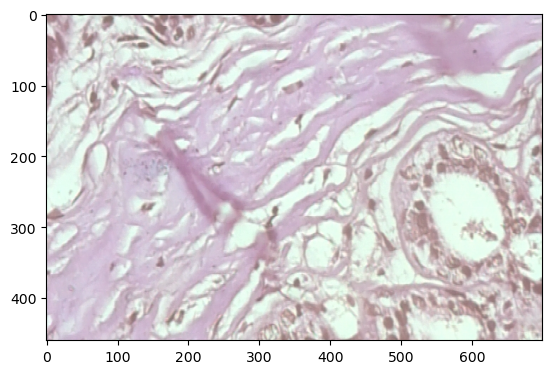

In [14]:
plt.imshow(benign_image)

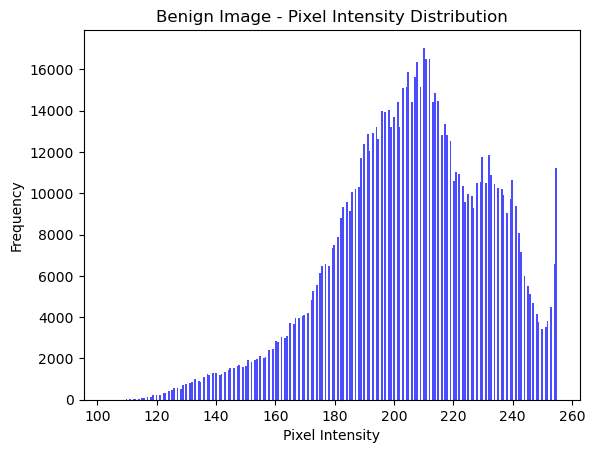

In [15]:
# Plotting the histogram directly from a 2D image array
# This method involves plotting the histogram of pixel intensity values 

plt.hist(benign_image.ravel(), bins=256, color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Benign Image - Pixel Intensity Distribution')
plt.show()


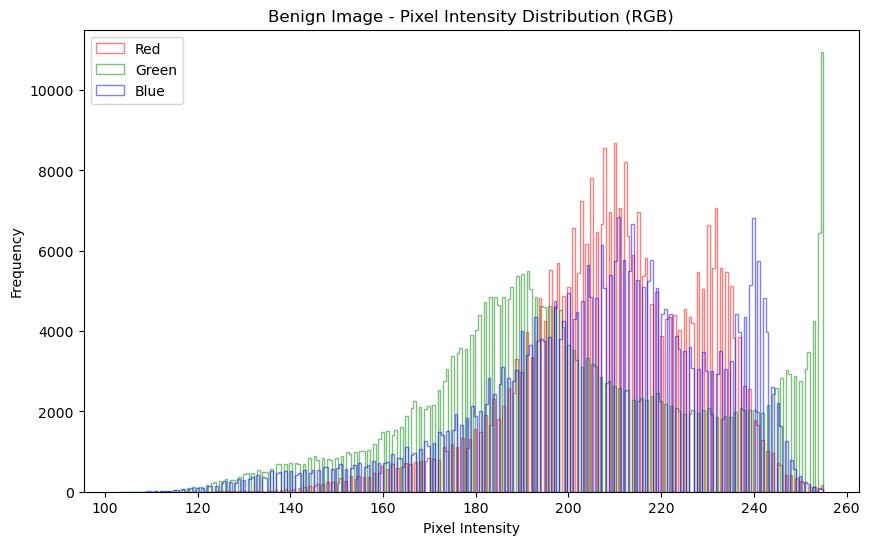

In [16]:
# RGB Channels

# Splitting the image into its RGB channels
red_channel = benign_image[:,:,0]
green_channel = benign_image[:,:,1]
blue_channel = benign_image[:,:,2]

# Plotting histograms for each color channel
plt.figure(figsize=(10, 6))

plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Benign Image - Pixel Intensity Distribution (RGB)')
plt.legend()
plt.show()

In [17]:
print("Shape of the image array:", benign_image.shape)

Shape of the image array: (460, 700, 3)


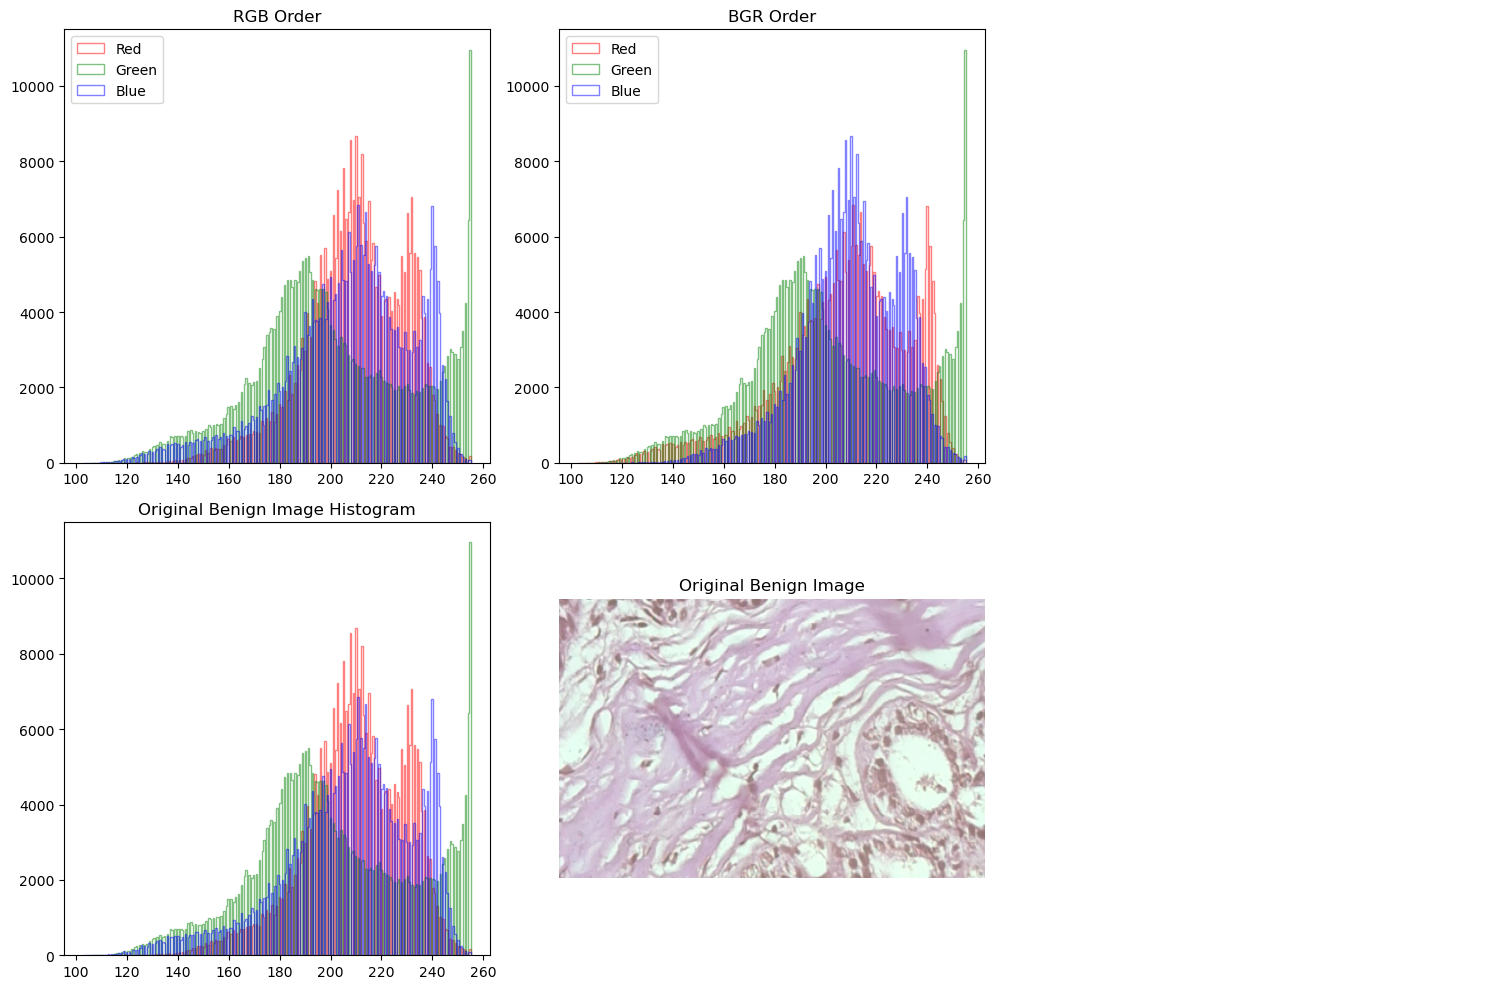

In [18]:
# Plotting histograms for both RGB and BGR orders
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# RGB order
axes[0, 0].hist(benign_image[:,:,0].ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
axes[0, 0].hist(benign_image[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
axes[0, 0].hist(benign_image[:,:,2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')
axes[0, 0].set_title('RGB Order')
axes[0, 0].legend()

# BGR order
axes[0, 1].hist(benign_image[:,:,2].ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
axes[0, 1].hist(benign_image[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
axes[0, 1].hist(benign_image[:,:,0].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')
axes[0, 1].set_title('BGR Order')
axes[0, 1].legend()

# Plot histogram for the original image
axes[1, 0].hist(benign_image[:,:,0].ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
axes[1, 0].hist(benign_image[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
axes[1, 0].hist(benign_image[:,:,2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')
axes[1, 0].set_title('Original Benign Image Histogram')

# Show the original image
axes[1, 1].imshow(benign_image)
axes[1, 1].axis('off')
axes[1, 1].set_title('Original Benign Image')

# Hide unused axes
axes[0, 2].axis('off')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

Now we see the original image is in the RGB order.

In [19]:
# Loading 200X benign image in grayscale 
benign_grayscale = cv2.imread('/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/200X/SOB_B_F-14-9133-200-038.png', cv2.IMREAD_GRAYSCALE)
benign_grayscale.shape

(460, 700)

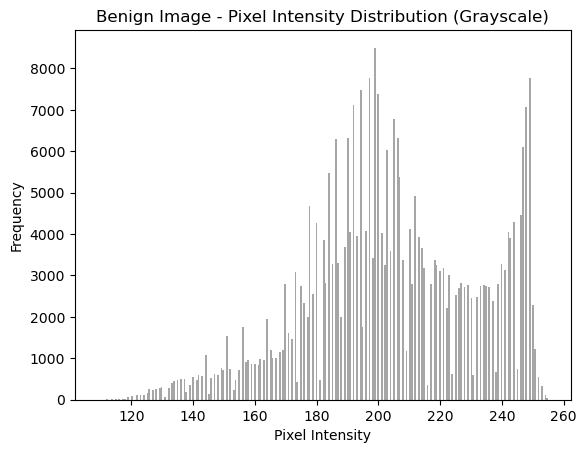

In [20]:
# Plotting the histogram
plt.hist(benign_grayscale.ravel(), bins=256, color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Benign Image - Pixel Intensity Distribution (Grayscale)')
plt.show()

In [21]:
# Loading 200X malignant image  
malignant_image = cv2.imread('/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979C/200X/SOB_M_MC-14-19979C-200-006.png')
malignant_image.shape

(460, 700, 3)

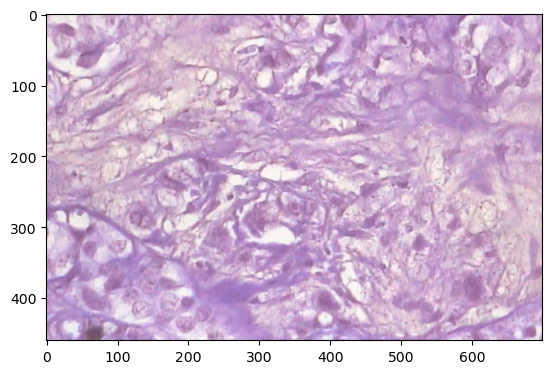

In [22]:
plt.imshow(malignant_image)

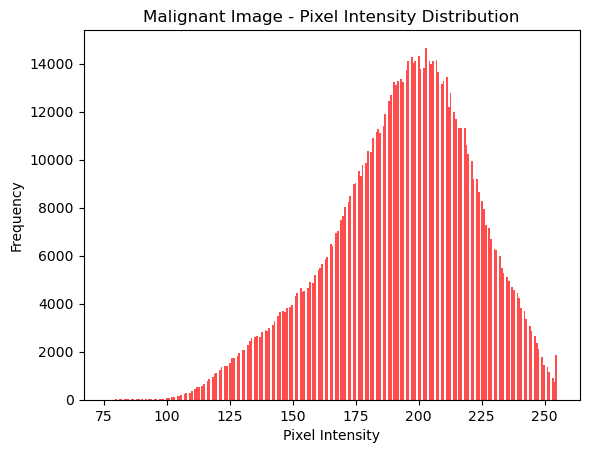

In [23]:
# Plotting the histogram directly from a 2D image array
# This method involves plotting the histogram of pixel intensity values

plt.hist(malignant_image.ravel(), bins=256, color='red', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Malignant Image - Pixel Intensity Distribution')
plt.show()


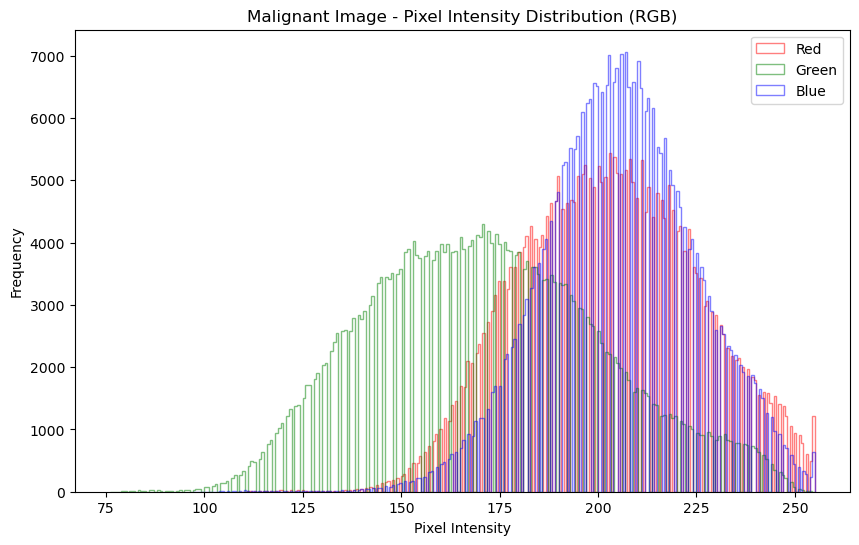

In [24]:
# RGB Channels

# Splitting the image into its RGB channels
red_channel = malignant_image[:,:,0]
green_channel = malignant_image[:,:,1]
blue_channel = malignant_image[:,:,2]

# Plotting histograms for each color channel
plt.figure(figsize=(10, 6))

plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Malignant Image - Pixel Intensity Distribution (RGB)')
plt.legend()
plt.show()

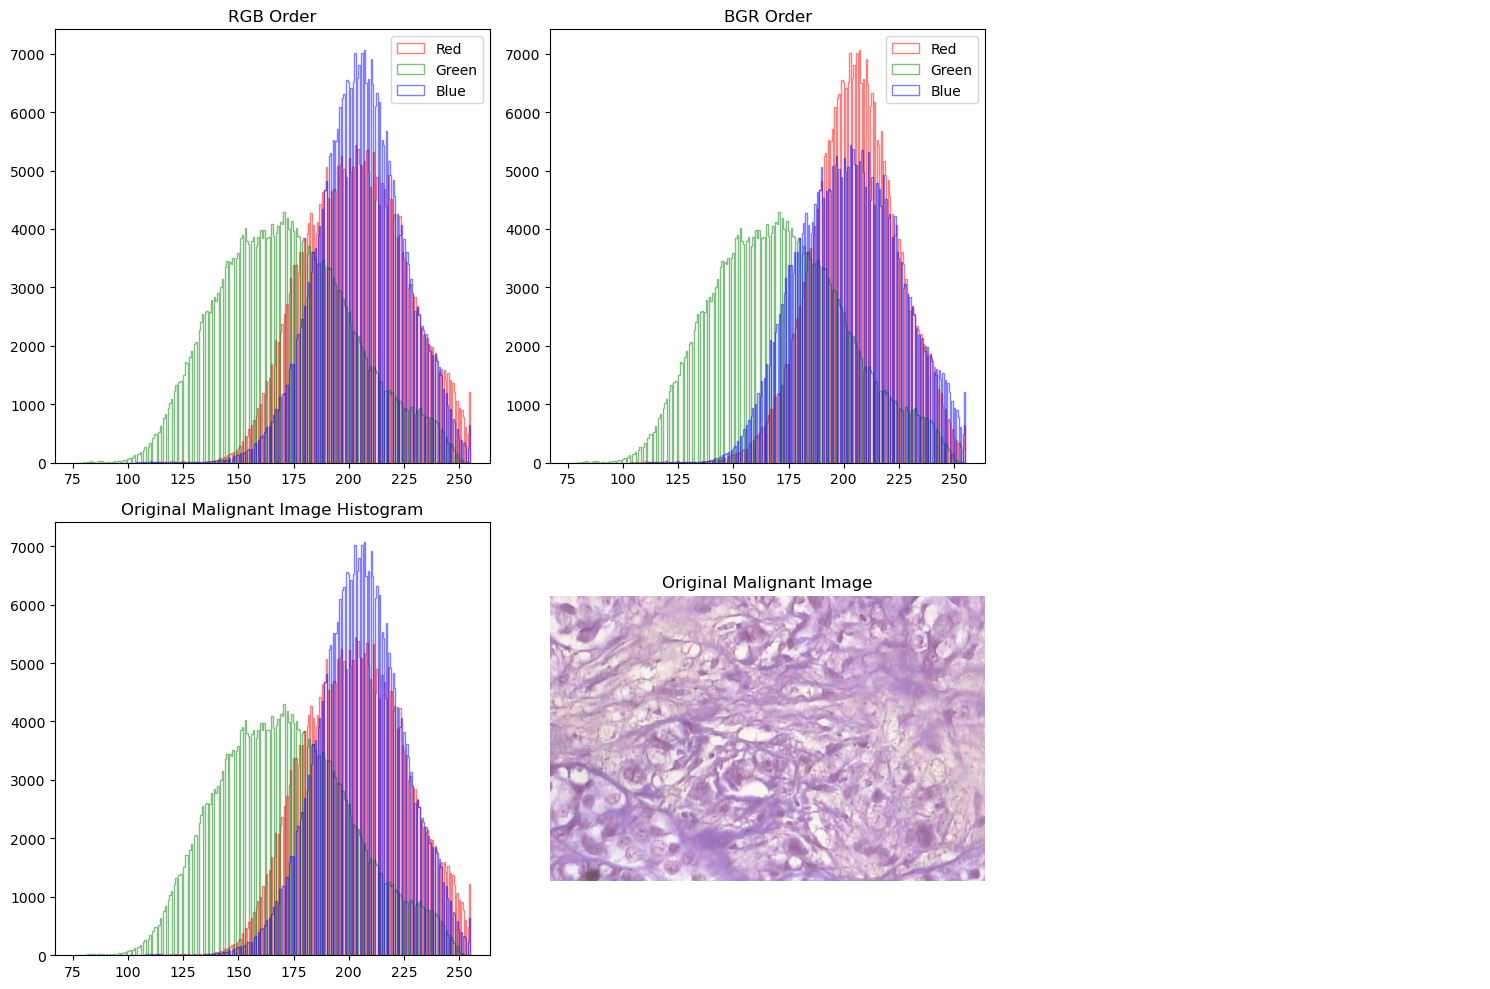

In [25]:
# Plotting histograms for both RGB and BGR orders
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# RGB order
axes[0, 0].hist(malignant_image[:,:,0].ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
axes[0, 0].hist(malignant_image[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
axes[0, 0].hist(malignant_image[:,:,2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')
axes[0, 0].set_title('RGB Order')
axes[0, 0].legend()

# BGR order
axes[0, 1].hist(malignant_image[:,:,2].ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
axes[0, 1].hist(malignant_image[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
axes[0, 1].hist(malignant_image[:,:,0].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')
axes[0, 1].set_title('BGR Order')
axes[0, 1].legend()

# Plot histogram for the original image
axes[1, 0].hist(malignant_image[:,:,0].ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
axes[1, 0].hist(malignant_image[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
axes[1, 0].hist(malignant_image[:,:,2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')
axes[1, 0].set_title('Original Malignant Image Histogram')

# Show the original image
axes[1, 1].imshow(malignant_image)
axes[1, 1].axis('off')
axes[1, 1].set_title('Original Malignant Image')

# Hide unused axes
axes[0, 2].axis('off')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [26]:
# Loading 200X malignant image in grayscale 
malignant_grayscale = cv2.imread('/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/200X/SOB_B_F-14-9133-200-038.png', cv2.IMREAD_GRAYSCALE)
malignant_grayscale.shape

(460, 700)

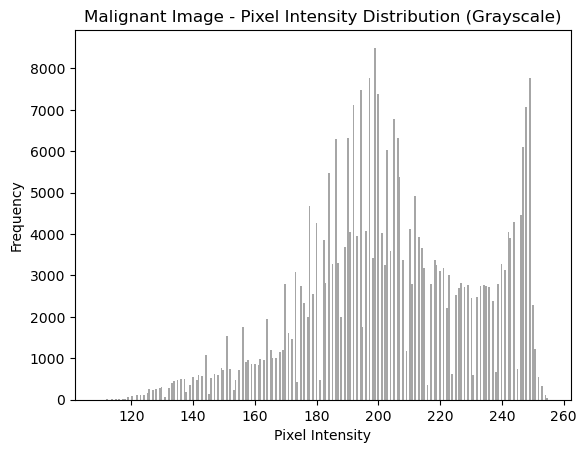

In [27]:
# Plotting the histogram
plt.hist(malignant_grayscale.ravel(), bins=256, color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Malignant Image - Pixel Intensity Distribution (Grayscale)')
plt.show()

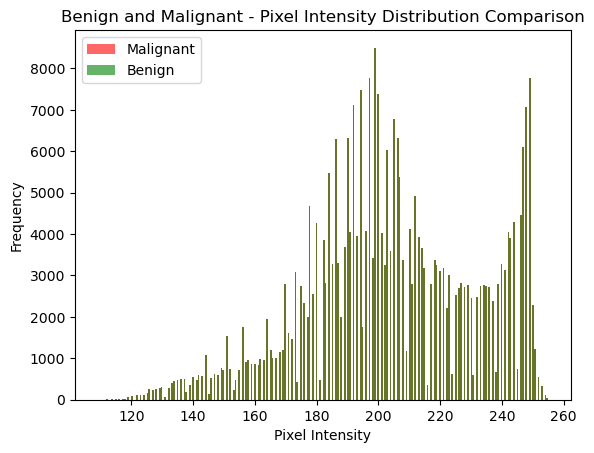

In [28]:
# Plotting histograms for both malignant and benign grayscale images
plt.hist(malignant_grayscale.flatten(), bins=256, color='red', alpha=0.6, label='Malignant')
plt.hist(benign_grayscale.flatten(), bins=256, color='green', alpha=0.6, label='Benign')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Benign and Malignant - Pixel Intensity Distribution Comparison')
plt.legend()
plt.show()

One of the distributions is overlapping and completely covering the other distribution. 

Tried setting/adjusting alpha to a different value between 0 and 1, to increase the transparency of the histogram bars, trying to make it easier to see overlapping distributions. 

Adjusting this parameter did not help in visualizing both distributions more clearly. Issue persists, so better to examine the pixel intensity distributions of each image separately to understand their characteristics better.

## 5-Fold Cross-Validation

The authors of the dataset 'Folds.csv' have chosen to use a 5-fold cross-validation strategy. In this approach, the dataset is divided into five approximately equal-sized subsets (folds).

The cross-validation strategy is designed such that the images in the training and test sets come from different individuals across each fold. This means that when the model is trained on a particular fold, it learns from data collected from certain individuals, and when it's tested on that fold, it's evaluated on data from different individuals. This helps in evaluating the model's ability to generalize to unseen individuals.


In [29]:
# Read the Folds.csv file 
fold_info = pd.read_csv("/Users/brindhamanivannan/Documents/breast-tumor-classifier/Folds.csv")

# Display full column values
pd.set_option('display.max_colwidth', None)

fold_info

fold  mag    grp  \
0         1  100  train   
1         1  100  train   
2         1  100  train   
3         1  100  train   
4         1  100  train   
...     ...  ...    ...   
39540     5  400   test   
39541     5  400   test   
39542     5  400   test   
39543     5  400   test   
39544     5  400   test   

                                                                                                                         filename  
0                  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png  
1                  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png  
2                  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png  
3                  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png  
4                  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png  
...                                                                                                                           ...  
39540  BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-011.png  
39541  BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-012.png  
39542  BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-013.png  
39543  BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-014.png  
39544  BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-015.png  

[39545 rows x 4 columns]

In [30]:
fold_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39545 entries, 0 to 39544
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fold      39545 non-null  int64 
 1   mag       39545 non-null  int64 
 2   grp       39545 non-null  object
 3   filename  39545 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


1. fold: This column contains integer values representing a fold number, indicating a partitioning scheme for cross-validation.

2. mag (Magnification): This column contains integer values representing the magnification level of the histopathological images.

3. grp (Group): This column contains categorical data represented as objects (strings), which categorize the images into train/test sets.

4. filename: This column contains object data representing the file paths of the breast tumor histopathological images.


In [31]:
# Create a new column named label to label the images

fold_info["label"] = fold_info["filename"].str.extract("(malignant|benign)")
fold_info.head()

fold  mag    grp  \
0     1  100  train   
1     1  100  train   
2     1  100  train   
3     1  100  train   
4     1  100  train   

                                                                                                         filename  \
0  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png   
1  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png   
2  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png   
3  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png   
4  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png   

    label  
0  benign  
1  benign  
2  benign  
3  benign  
4  benign

The above code reads in the Folds.csv file containing information about folds, extracts information from the "filename" column to determine the label (whether it's "malignant" or "benign"), adds this label information as a new column called "label", and then displays the first few rows of the DataFrame to verify the changes.

This is a classification problem using image data and hence labeling the images is required.

## Explore the dataset Folds.csv

In [32]:
fold_info['mag'].unique()

array([100, 200,  40, 400])

In [33]:
fold_info['fold'].unique()

array([1, 2, 3, 4, 5])

In [34]:
fold_info['grp'].unique()

array(['train', 'test'], dtype=object)

In [35]:
fold_info['filename'].nunique()

7909

- Each fold contains all 7,909 available images. 

- In each fold of the cross-validation process, the images used for training the model and those used for testing the model come from different individuals. This helps ensure that the model is not biased towards recognizing specific individuals but instead learns generalizable patterns.

- The second fold is chosen specifically because it contains a higher proportion of training data compared to the other folds.

- By selecting the fold with more training data, it allows for potentially better model training.


In [36]:
fold_info.shape

(39545, 5)

In [37]:
7909 * 5

39545

In [38]:
selected_fold = 2
selected_fold_data = fold_info.query("fold == @selected_fold").copy().reset_index(drop=True)
selected_fold_data

fold  mag    grp  \
0        2  100  train   
1        2  100  train   
2        2  100  train   
3        2  100  train   
4        2  100  train   
...    ...  ...    ...   
7904     2  400   test   
7905     2  400   test   
7906     2  400   test   
7907     2  400   test   
7908     2  400   test   

                                                                                                                      filename  \
0               BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png   
1               BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png   
2               BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png   
3               BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png   
4               BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png   
...                                                                                                                        ...   
7904  BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-020.png   
7905  BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-021.png   
7906  BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-022.png   
7907  BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-023.png   
7908  BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-024.png   

          label  
0        benign  
1        benign  
2        benign  
3        benign  
4        benign  
...         ...  
7904  malignant  
7905  malignant  
7906  malignant  
7907  malignant  
7908  malignant  

[7909 rows x 5 columns]

This line filters the DataFrame fold_info to select only the rows where the "fold" column has a value equal to the selected_fold. The query() method is used for this purpose. The result is stored in selected_fold_data. The copy() method ensures that a new copy of the filtered DataFrame is created, and the reset_index(drop=True) method resets the index of the DataFrame so that it starts from 0 and drops the old index.

In [44]:
grp_counts = selected_fold_data['grp'].value_counts()
grp_counts

grp
train    5506
test     2403
Name: count, dtype: int64

In [45]:
# Print the counts
print("Number of train rows:", grp_counts['train'])
print("Number of test rows:", grp_counts['test'])

Number of train rows: 5506
Number of test rows: 2403


In [46]:
selected_fold_data["filename"] = ('/Users/brindhamanivannan/Documents/breast-tumor-classifier/' + selected_fold_data["filename"])


In [47]:
selected_fold_data.head()

fold  mag    grp  \
0     2  100  train   
1     2  100  train   
2     2  100  train   
3     2  100  train   
4     2  100  train   

                                                                                                                                                                    filename  \
0  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png   
1  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png   
2  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png   
3  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png   
4  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png   

    label  
0  benign  
1  benign  
2  benign  
3  benign  
4  benign

This above code modifies the "filename" column in the selected_fold_data DataFrame by appending a path prefix to each filename. This is done to create full file paths.

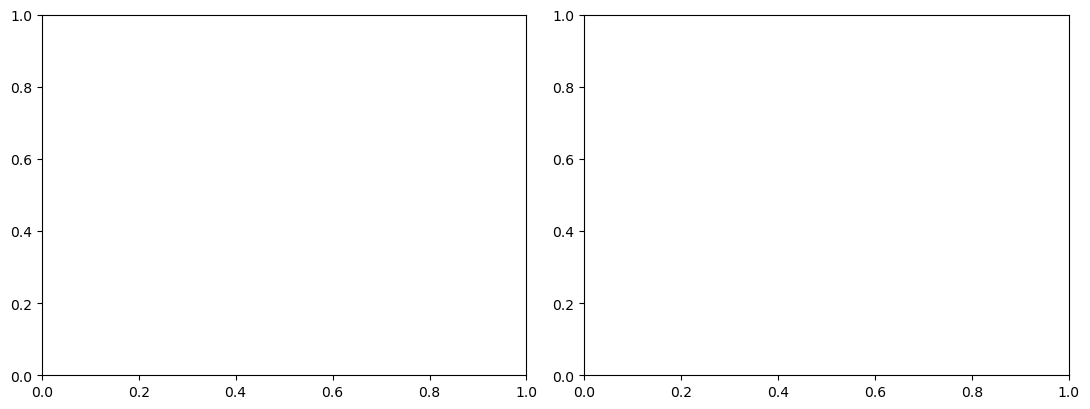

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 4.2), tight_layout=True)

<Axes: xlabel='fold', ylabel='count'>

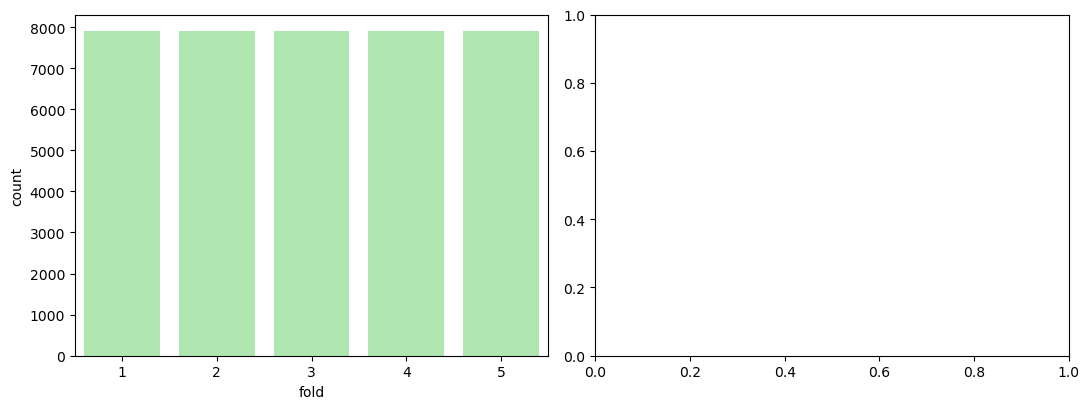

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 4.2), tight_layout=True)

# Plot image count in each fold
sb.countplot(data=fold_info, x="fold", color="lightgreen", ax=ax1, alpha=0.8)

Text(0.5, 1.0, 'Available images in each fold')

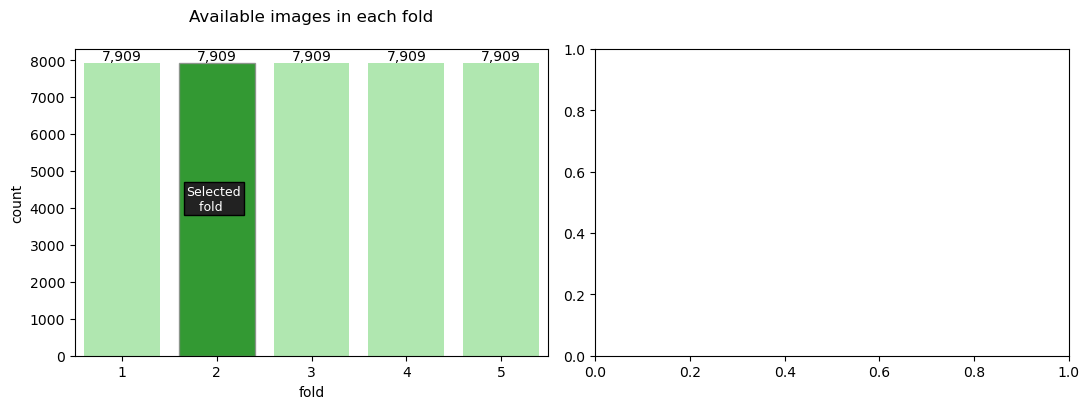

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 4.2), tight_layout=True)

# Plot image count in each fold
sb.countplot(data=fold_info, x="fold", color="lightgreen", ax=ax1, alpha=0.8)

bars = ax1.containers[0]
ax1.bar_label(bars, padding=0.1, labels=[f"{x:,.0f}" for x in bars.datavalues])
_selected_bar = bars[selected_fold - 1]
_selected_bar.set_facecolor("green")
_selected_bar.set_edgecolor("#888")
ax1.text(_selected_bar.get_x() + 0.08, _selected_bar.get_height() / 2,
         "Selected\n   fold", size=9, color="#fff",
         bbox={"pad": 2, "facecolor": "#222"})
ax1.set_title("Available images in each fold", size=12, pad=20)

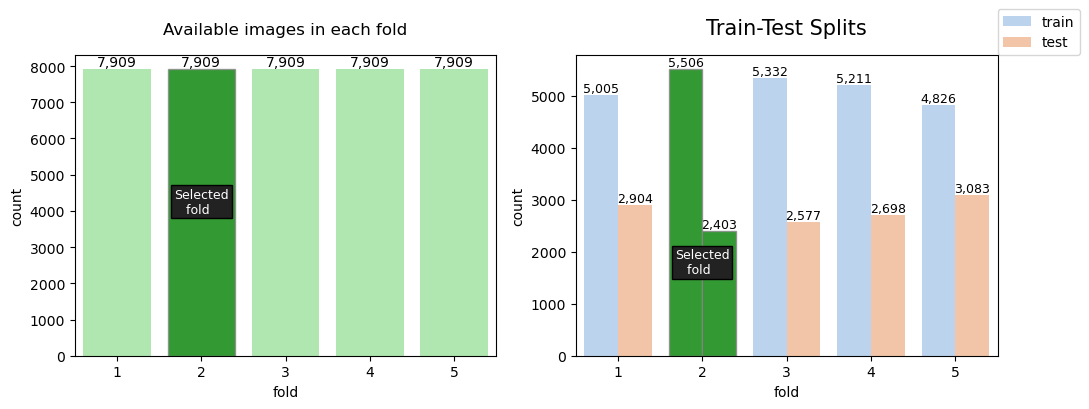

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 4.2), tight_layout=True)

# Plot image count in each fold
sb.countplot(data=fold_info, x="fold", color="lightgreen", ax=ax1, alpha=0.8)

bars = ax1.containers[0]
ax1.bar_label(bars, padding=0.1, labels=[f"{x:,.0f}" for x in bars.datavalues])
_selected_bar = bars[selected_fold - 1]
_selected_bar.set_facecolor("green")
_selected_bar.set_edgecolor("#888")
ax1.text(_selected_bar.get_x() + 0.08, _selected_bar.get_height() / 2,
         "Selected\n   fold", size=9, color="#fff",
         bbox={"pad": 2, "facecolor": "#222"})
ax1.set_title("Available images in each fold", size=12, pad=15)




# Visualizes the distribution of train-test splits across different folds

sb.countplot(data=fold_info, x="fold", hue="grp", palette="pastel",
              ax=ax2, alpha=0.8)
for bars in ax2.containers:
    ax2.bar_label(bars, [f"{x:,.0f}" for x in bars.datavalues], size=9)
    bars[selected_fold - 1].set_facecolor("green")
    bars[selected_fold - 1].set_edgecolor("#888")
ax2.text(_selected_bar.get_x() + 0.07, _selected_bar.get_height() / 5,
         "Selected\n   fold", size=9, color="#fff",
         bbox={"pad": 2, "facecolor": "#222"})
ax2.set_title("Train-Test Splits", size=15, pad=15)
ax2.legend(loc=(1, 1));

The variations in the train/test count are expected and are a consequence of the random splitting and sampling procedures inherent in the cross-validation technique.

In [52]:
selected_fold_data['label'].value_counts()

label
malignant    5429
benign       2480
Name: count, dtype: int64

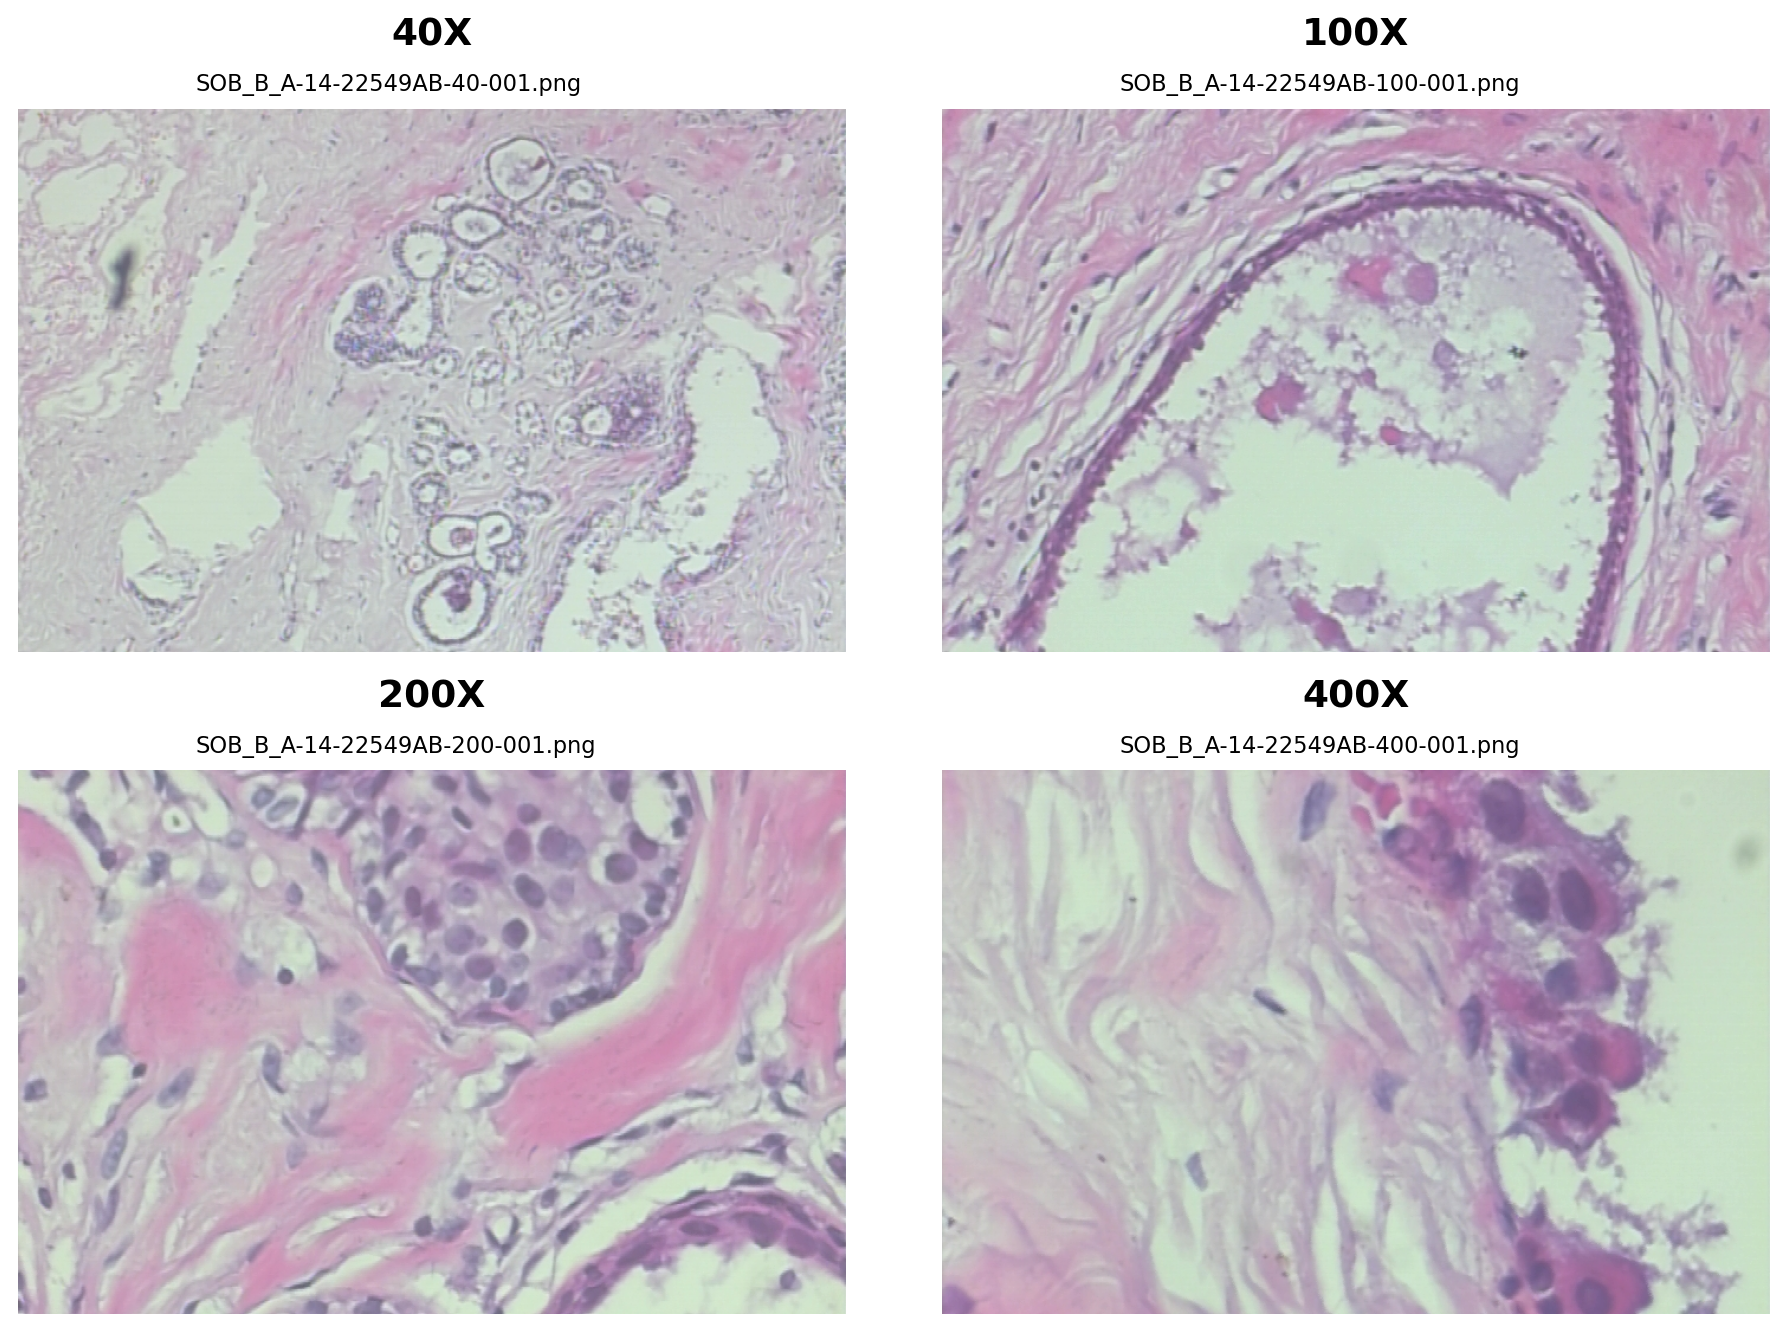

In [53]:
# visualization of sample images from the dataset
# with each subplot displaying an image along with its magnification level and filename

from PIL import Image

fig, axes = plt.subplots(2, 2, figsize=(11, 7.5), dpi=180, tight_layout=True)
sample_images = selected_fold_data.groupby("mag", as_index=False).first()
for ax, row in zip(axes.flat, sample_images.itertuples()):
    img = Image.open(row.filename)
    ax.imshow(img)
    ax.set_title(f"{row.mag}X", size=15, pad=25, weight=600)
    ax.text(150, -15, row.filename.split("/")[-1], size=9)
    ax.axis("off")

## Image Validation 

In [54]:
pip install cleanvision

Note: you may need to restart the kernel to use updated packages.


Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/7909 [00:00<?, ?it/s]

  0%|          | 0/7909 [00:00<?, ?it/s]

Issue checks completed. 330 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | exact_duplicates |          250 |
|  1 | odd_size         |           74 |
|  2 | near_duplicates  |            6 |
|  3 | blurry           |            0 |
|  4 | dark             |            0 |
|  5 | grayscale        |            0 |
|  6 | light            |            0 |
|  7 | low_information  |            0 |
|  8 | odd_aspect_ratio |            0 | 

----------------- exact_duplicates images ------------------

Number of examples with this issue: 250
Examples representing most severe instances of this issue:

Set: 0


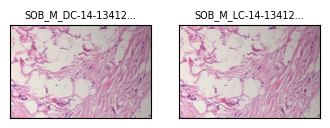

Set: 1


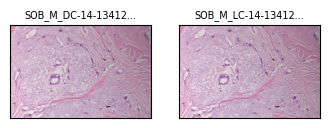

Set: 2


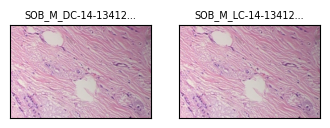

Set: 3


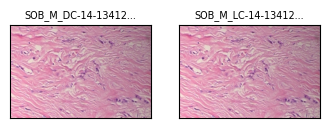

--------------------- odd_size images ----------------------

Number of examples with this issue: 74
Examples representing most severe instances of this issue:



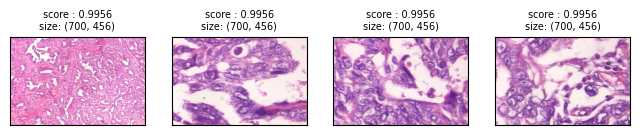

------------------ near_duplicates images ------------------

Number of examples with this issue: 6
Examples representing most severe instances of this issue:

Set: 0


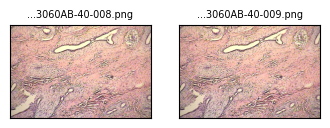

Set: 1


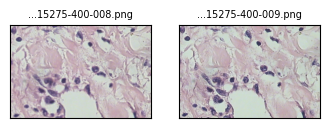

Set: 2


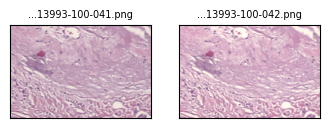

In [55]:
from cleanvision import Imagelab

imagelab = Imagelab(filepaths=list(selected_fold_data["filename"]))
imagelab.find_issues()
imagelab.report(verbosity=4)

In [56]:
duplicated_images = imagelab.issues[["is_exact_duplicates_issue", "is_near_duplicates_issue"]]
duplicated_images.head()

is_exact_duplicates_issue  \
/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png                      False   
/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png                      False   
/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png                      False   
/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png                      False   
/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png                      False   

                                                                                                                                                                           is_near_duplicates_issue  
/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png                     False  
/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png                     False  
/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png                     False  
/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png                     False  
/Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png                     False

In [57]:
duplicated_images = imagelab.issues[["is_exact_duplicates_issue", "is_near_duplicates_issue"]].any(axis=1).reset_index()
duplicated_images

index  \
0               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png   
1               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png   
2               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png   
3               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png   
4               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png   
...                                                                                                                                                                                   ...   
7904  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-020.png   
7905  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-021.png   
7906  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-022.png   
7907  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-023.png   
7908  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-024.png   

          0  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
7904  False  
7905  False  
7906  False  
7907  False  
7908  False  

[7909 rows x 2 columns]

In [58]:
duplicated_images = imagelab.issues[["is_exact_duplicates_issue", "is_near_duplicates_issue"]].any(axis=1).reset_index().rename(columns={"index": "filename", 0: "duplicated"})
duplicated_images

filename  \
0               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png   
1               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png   
2               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png   
3               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png   
4               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png   
...                                                                                                                                                                                   ...   
7904  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-020.png   
7905  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-021.png   
7906  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-022.png   
7907  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-023.png   
7908  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-024.png   

      duplicated  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
7904       False  
7905       False  
7906       False  
7907       False  
7908       False  

[7909 rows x 2 columns]

In [59]:
duplicated_images['duplicated'].value_counts()

duplicated
False    7653
True      256
Name: count, dtype: int64

This code segment extracts information about exact and near duplicate issues from the issues attribute of the imagelab object, combines them into a single indicator of duplication status for each image, and presents the result in a dataframe format.

In [60]:
# Verify that the filenames in the duplicated_images df are identical to those in the selected_fold_data df

assert duplicated_images["filename"].equals(selected_fold_data["filename"])

If the filenames do not align, it indicates a potential issue, and the assertion will raise an AssertionError.

In [62]:
selected_fold_data.shape

(7909, 5)

In [63]:
# Drop all duplicated images, then validate again 
selected_fold_data = selected_fold_data[~duplicated_images["duplicated"]]
selected_fold_data

fold  mag    grp  \
0        2  100  train   
1        2  100  train   
2        2  100  train   
3        2  100  train   
4        2  100  train   
...    ...  ...    ...   
7904     2  400   test   
7905     2  400   test   
7906     2  400   test   
7907     2  400   test   
7908     2  400   test   

                                                                                                                                                                                 filename  \
0               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png   
1               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png   
2               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png   
3               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png   
4               /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png   
...                                                                                                                                                                                   ...   
7904  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-020.png   
7905  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-021.png   
7906  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-022.png   
7907  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-023.png   
7908  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-024.png   

          label  
0        benign  
1        benign  
2        benign  
3        benign  
4        benign  
...         ...  
7904  malignant  
7905  malignant  
7906  malignant  
7907  malignant  
7908  malignant  

[7653 rows x 5 columns]

In [64]:
selected_fold_data.shape

(7653, 5)

In [65]:
7653 + 256


7909

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/7653 [00:00<?, ?it/s]

  0%|          | 0/7653 [00:00<?, ?it/s]

Issue checks completed. 74 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | odd_size         |           74 |
|  1 | blurry           |            0 |
|  2 | dark             |            0 |
|  3 | grayscale        |            0 |
|  4 | light            |            0 |
|  5 | low_information  |            0 |
|  6 | odd_aspect_ratio |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

--------------------- odd_size images ----------------------

Number of examples with this issue: 74
Examples representing most severe instances of this issue:



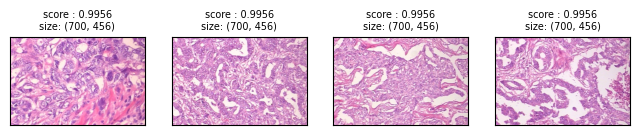

In [66]:
imagelab = Imagelab(filepaths=list(selected_fold_data["filename"]))
imagelab.find_issues()
imagelab.report(verbosity=4)

In [67]:
# Use data in selected fold (2) with magnification factor >= 200X

train = selected_fold_data.query("mag >= 200 and grp == 'train'")
test = selected_fold_data.query("mag >= 200 and grp == 'test'")
train.shape, test.shape

((2566, 5), (1149, 5))

In [68]:
train

fold  mag    grp  \
30       2  200  train   
31       2  200  train   
32       2  200  train   
33       2  200  train   
34       2  200  train   
...    ...  ...    ...   
5501     2  400  train   
5502     2  400  train   
5503     2  400  train   
5504     2  400  train   
5505     2  400  train   

                                                                                                                                                                                   filename  \
30                /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/200X/SOB_B_A-14-22549AB-200-001.png   
31                /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/200X/SOB_B_A-14-22549AB-200-002.png   
32                /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/200X/SOB_B_A-14-22549AB-200-003.png   
33                /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/200X/SOB_B_A-14-22549AB-200-004.png   
34                /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/200X/SOB_B_A-14-22549AB-200-005.png   
...                                                                                                                                                                                     ...   
5501  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-011.png   
5502  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-012.png   
5503  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-013.png   
5504  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-014.png   
5505  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-015.png   

          label  
30       benign  
31       benign  
32       benign  
33       benign  
34       benign  
...         ...  
5501  malignant  
5502  malignant  
5503  malignant  
5504  malignant  
5505  malignant  

[2566 rows x 5 columns]

In [69]:
test

fold  mag   grp  \
5540     2  200  test   
5541     2  200  test   
5542     2  200  test   
5543     2  200  test   
5544     2  200  test   
...    ...  ...   ...   
7904     2  400  test   
7905     2  400  test   
7906     2  400  test   
7907     2  400  test   
7908     2  400  test   

                                                                                                                                                                                 filename  \
5540              /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549G/200X/SOB_B_A-14-22549G-200-001.png   
5541              /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549G/200X/SOB_B_A-14-22549G-200-002.png   
5542              /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549G/200X/SOB_B_A-14-22549G-200-003.png   
5543              /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549G/200X/SOB_B_A-14-22549G-200-004.png   
5544              /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549G/200X/SOB_B_A-14-22549G-200-005.png   
...                                                                                                                                                                                   ...   
7904  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-020.png   
7905  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-021.png   
7906  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-022.png   
7907  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-023.png   
7908  /Users/brindhamanivannan/Documents/breast-tumor-classifier/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X/SOB_M_PC-14-9146-400-024.png   

          label  
5540     benign  
5541     benign  
5542     benign  
5543     benign  
5544     benign  
...         ...  
7904  malignant  
7905  malignant  
7906  malignant  
7907  malignant  
7908  malignant  

[1149 rows x 5 columns]

In [70]:
train_label_counts = train['label'].value_counts()

In [71]:
train_label_counts

label
malignant    1692
benign        874
Name: count, dtype: int64

In [72]:
test_label_counts = test['label'].value_counts()
test_label_counts

label
malignant    814
benign       335
Name: count, dtype: int64

(0.0, 2000.0)

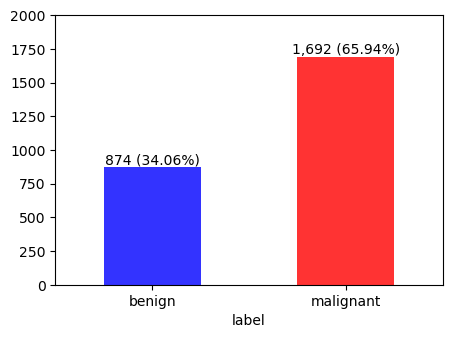

In [73]:
classes = dict(benign=0, malignant=1)
class_names = list(classes.keys())
label_counts = train["label"].value_counts(ascending=True)
ax = label_counts.plot.bar(color=["blue", "red"], alpha=0.8,
                           figsize=(5, 3.5))
ax.bar_label(ax.containers[0], padding=0.1,
             labels=[f"{x:,} ({x/len(train):.2%})" for x in label_counts])
ax.set_xticklabels(["benign", "malignant"], rotation=0);

# Set specific Y-axis limits
ax.set_ylim([0, 2000])  

## Target Distribution


There are significantly more images of malignant cases than there are of benign ones.

When there's class imbalance in a classification problem, accuracy is an unreliable metric; it becomes easy to achieve high accuracy by just predicting more of the majority class.

We will therefore use ROC-AUC and a confusion matrix for model evaluation.

ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): ROC-AUC is a metric that evaluates the performance of a classification model across various threshold settings. It measures the model's ability to distinguish between the positive and negative classes, regardless of class imbalance.

Confusion Matrix: A confusion matrix provides a detailed breakdown of the model's predictions compared to the actual classes. It includes metrics such as true positives, true negatives, false positives, and false negatives, which can be used to assess the model's performance, especially in the context of class imbalance.


These metrics provide a more comprehensive understanding of the model's performance, particularly when dealing with imbalanced datasets.